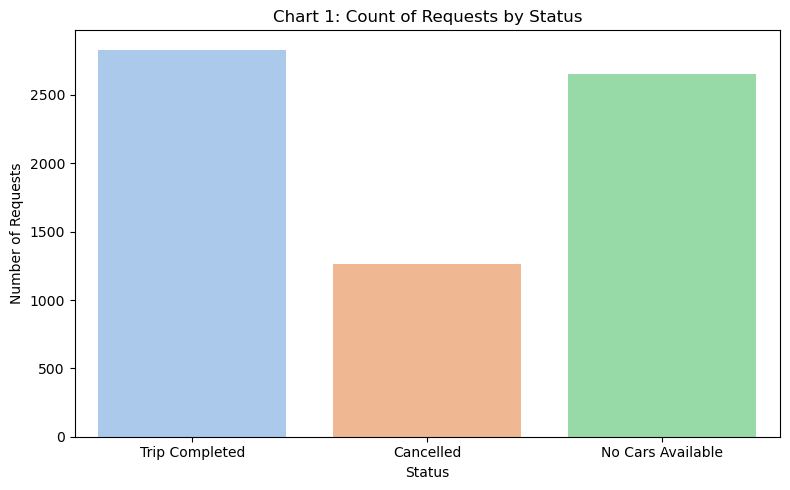

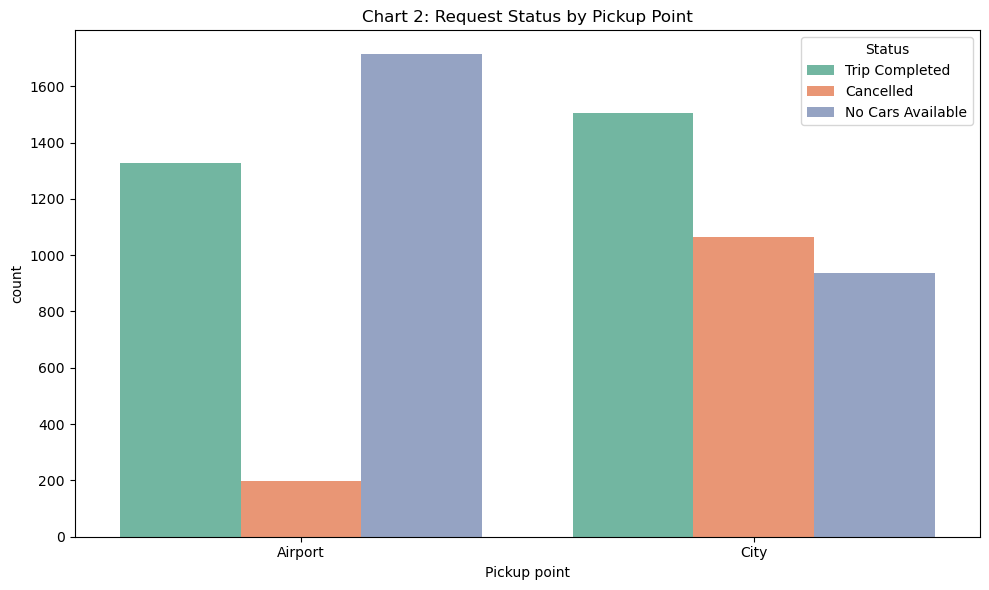

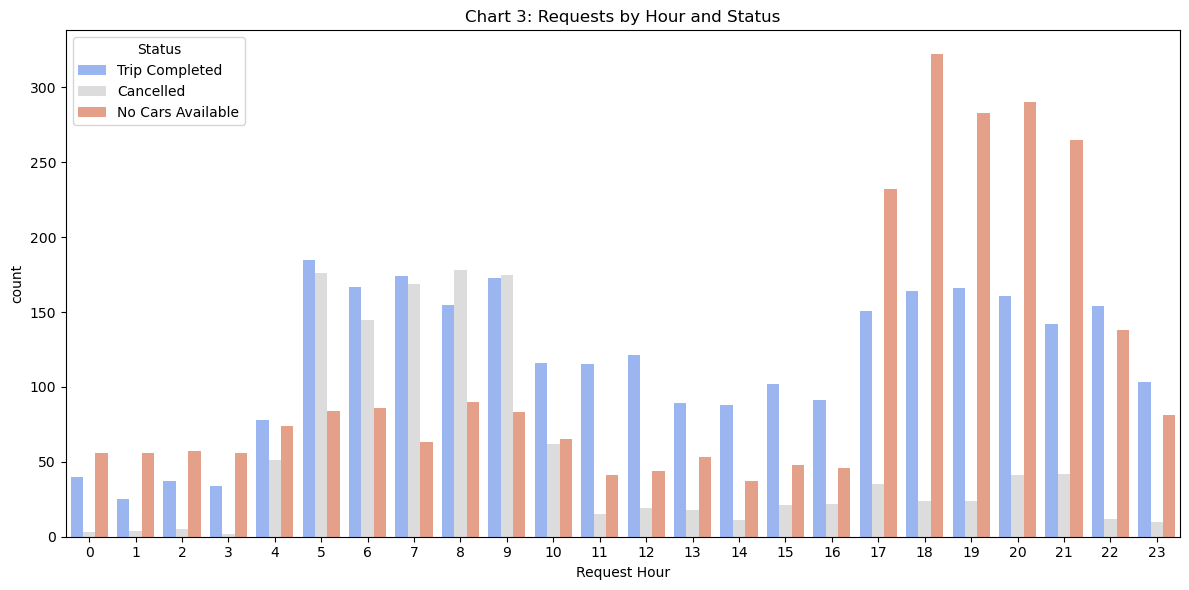

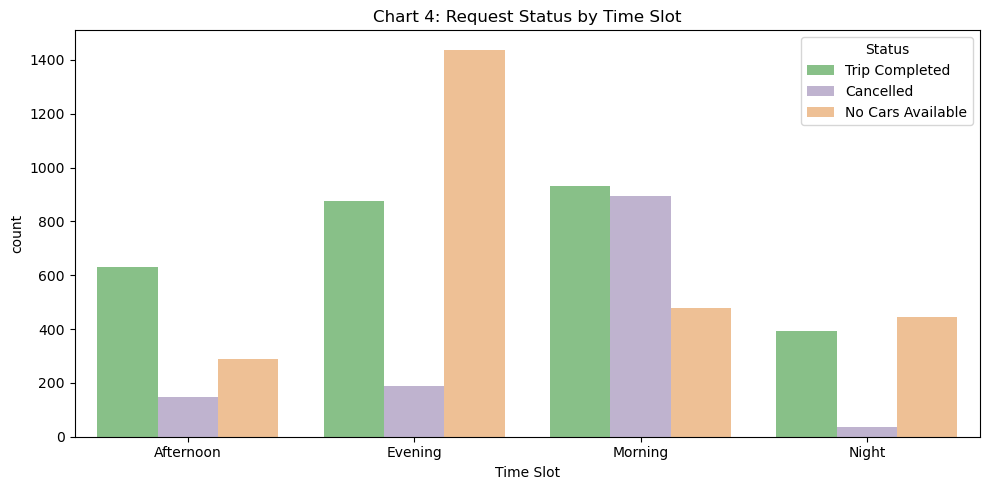

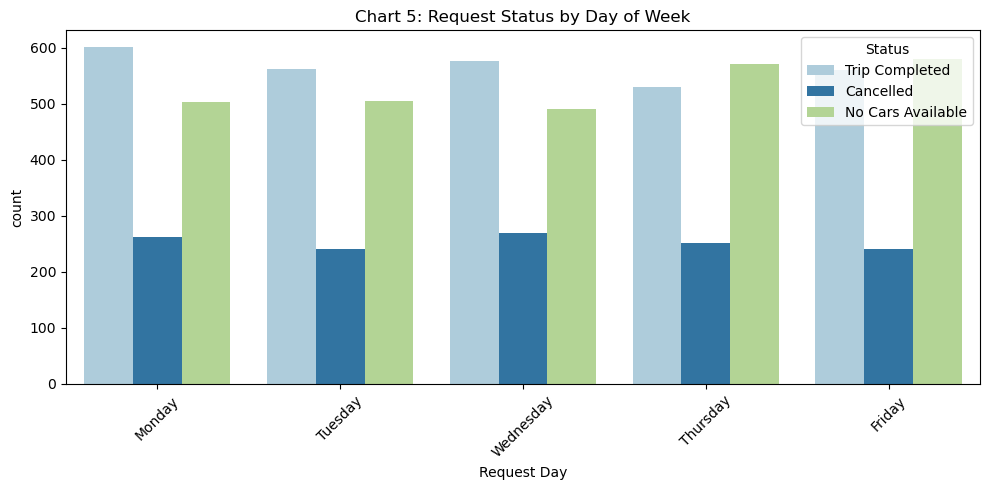

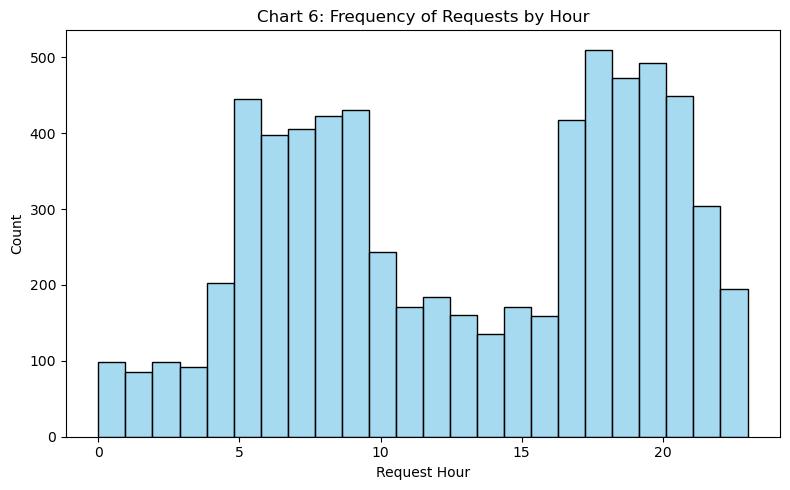

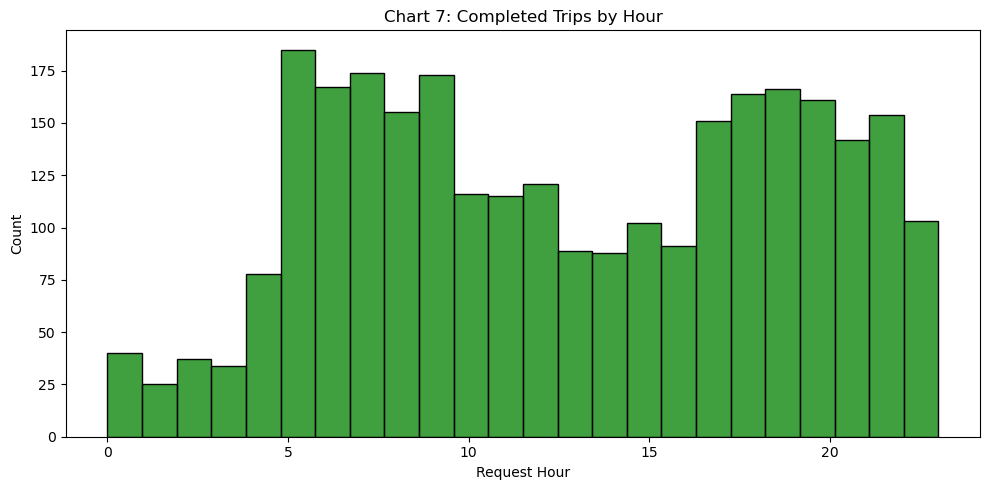

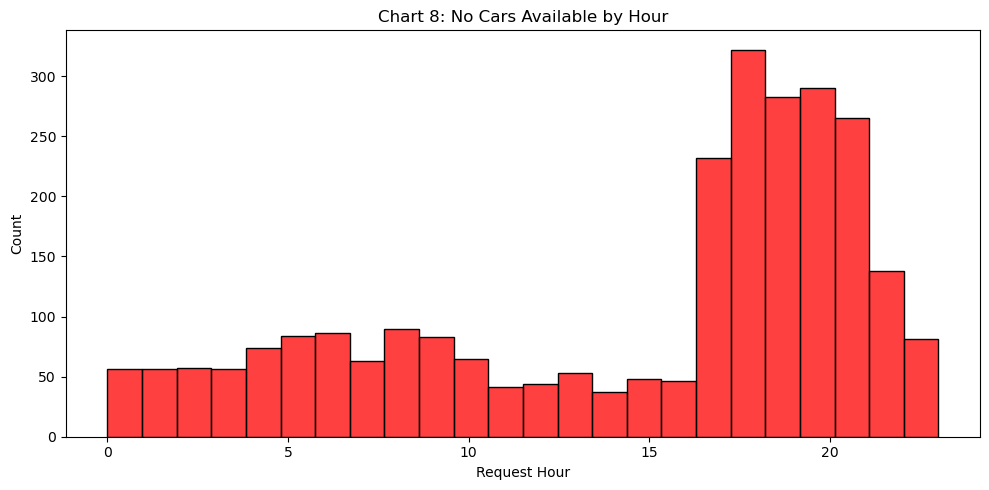

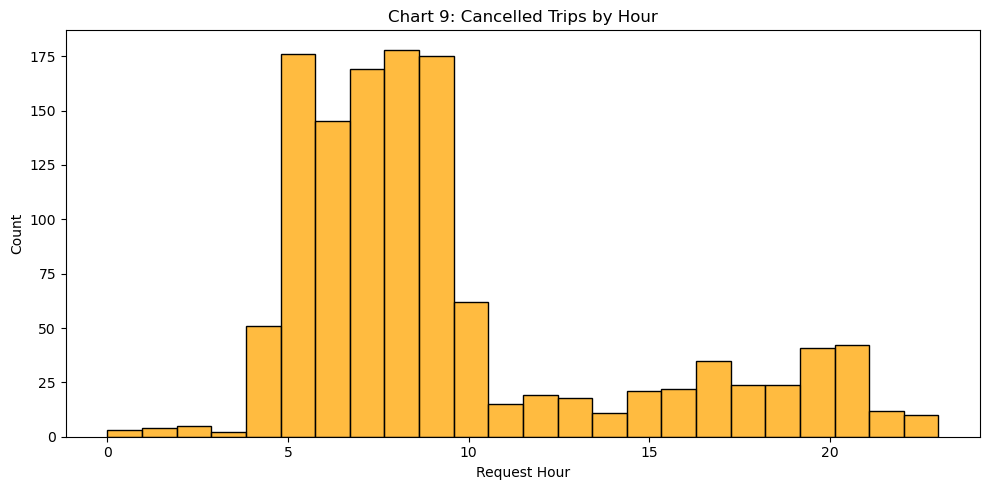

C:\Users\91965\AppData\Local\Temp\ipykernel_28924\3294783094.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pickup point', y='Request Hour', palette='Pastel1')


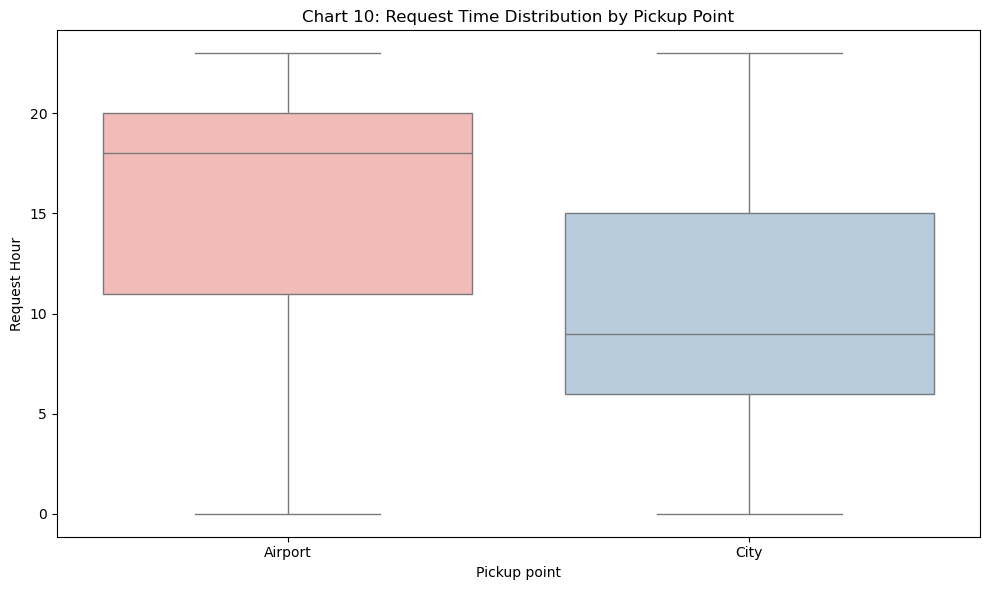

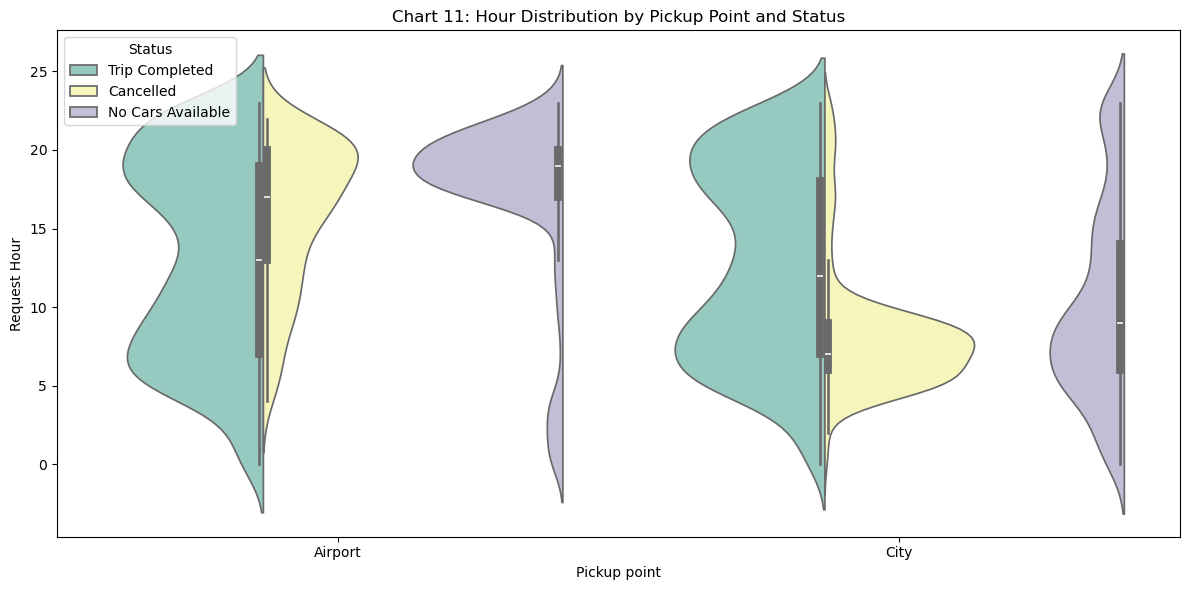

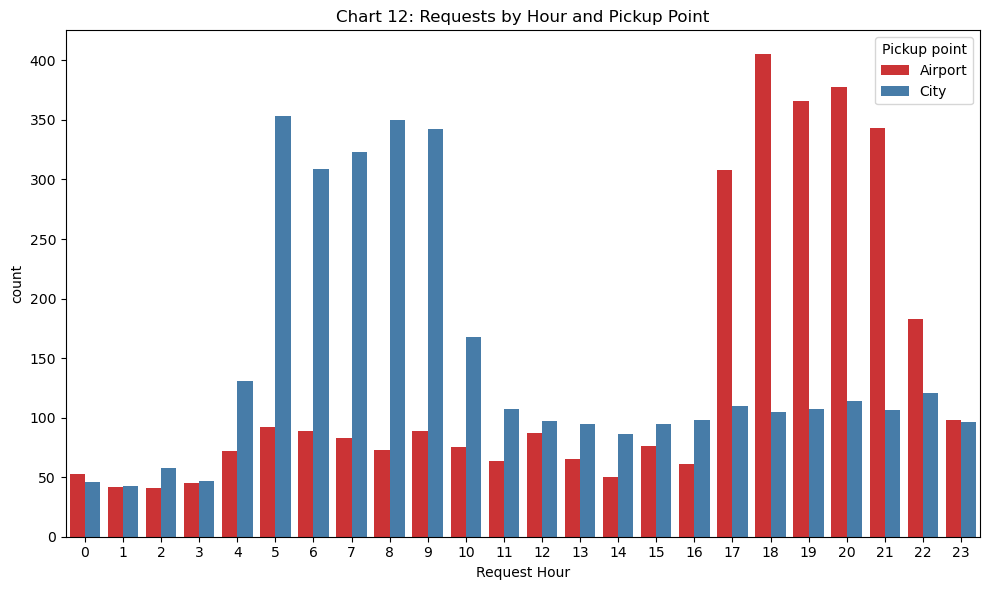

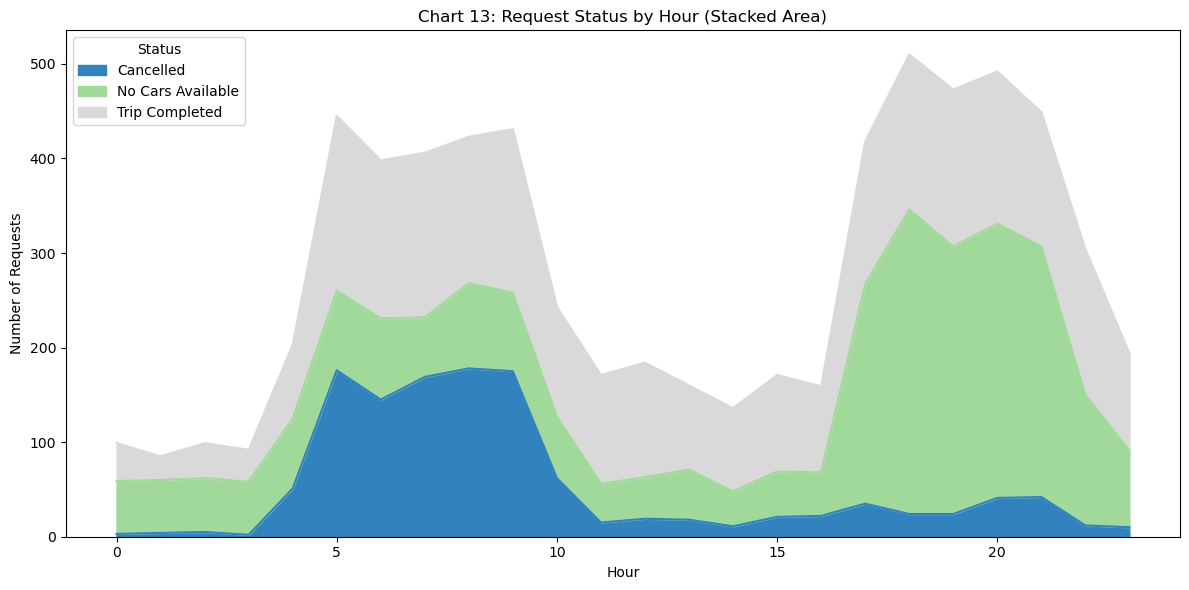

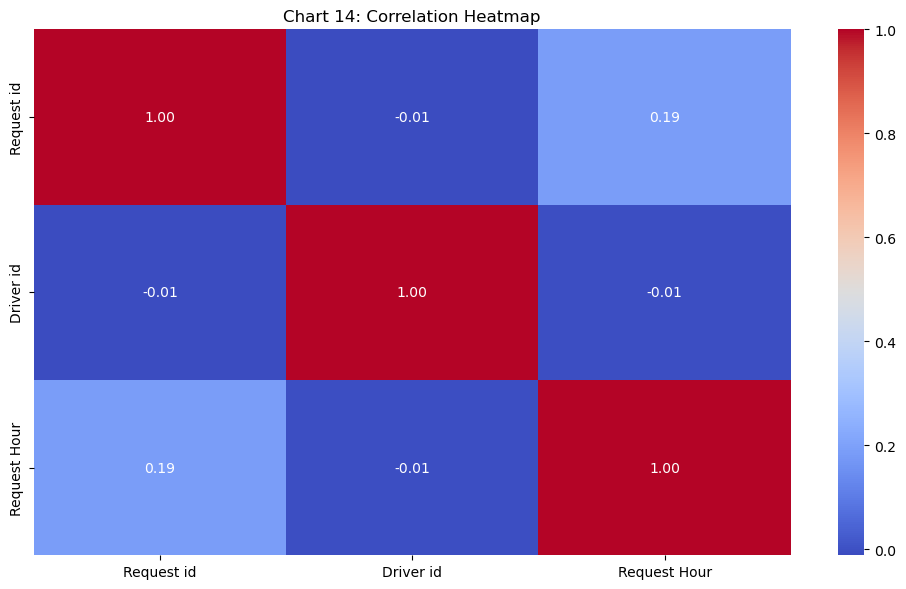

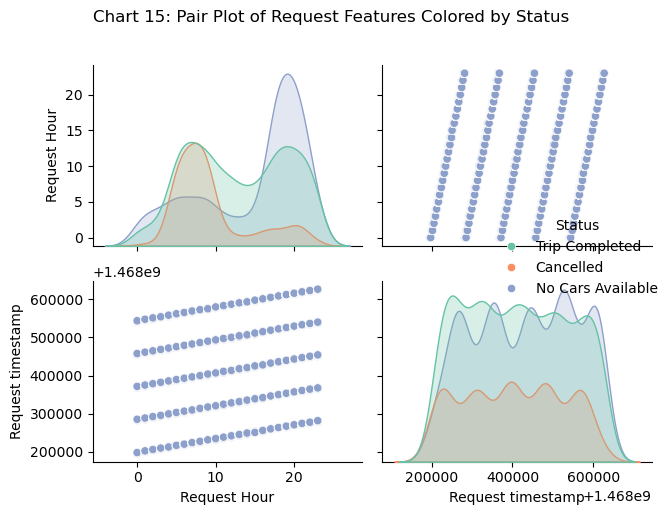

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"E:\Desktop\Projects\Uber EDA\Uber Request Data Cleaned.csv")


# Convert timestamp columns to datetime using dayfirst format
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True)
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

# Extract time-based features from request timestamp
df['Request Hour'] = df['Request timestamp'].dt.hour
df['Request Day'] = df['Request timestamp'].dt.day_name()

# Define time slots based on the hour of the request
def assign_time_slot(hour):
    if 4 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['Time Slot'] = df['Request Hour'].apply(assign_time_slot)

# Chart 1: Count of requests by overall status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Status', hue='Status', palette='pastel', legend=False)
plt.title("Chart 1: Count of Requests by Status")
plt.xlabel("Status")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()

# Chart 2: Count of requests by pickup point and status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pickup point', hue='Status', palette='Set2')
plt.title("Chart 2: Request Status by Pickup Point")
plt.tight_layout()
plt.show()

# Chart 3: Distribution of request statuses by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Request Hour', hue='Status', palette='coolwarm')
plt.title("Chart 3: Requests by Hour and Status")
plt.tight_layout()
plt.show()

# Chart 4: Distribution of statuses across time slots (Morning, Afternoon, etc.)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Time Slot', hue='Status', palette='Accent')
plt.title("Chart 4: Request Status by Time Slot")
plt.tight_layout()
plt.show()

# Chart 5: Distribution of request statuses across weekdays
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Request Day', hue='Status', palette='Paired')
plt.title("Chart 5: Request Status by Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chart 6: Overall request volume by hour
plt.figure(figsize=(8, 5))
sns.histplot(df['Request Hour'], bins=24, kde=False, color='skyblue')
plt.title("Chart 6: Frequency of Requests by Hour")
plt.tight_layout()
plt.show()

# Chart 7: Completed trip volume by hour
plt.figure(figsize=(10, 5))
sns.histplot(data=df[df['Status'] == 'Trip Completed'], x='Request Hour', bins=24, color='green')
plt.title("Chart 7: Completed Trips by Hour")
plt.tight_layout()
plt.show()

# Chart 8: Unavailability of cars by hour
plt.figure(figsize=(10, 5))
sns.histplot(data=df[df['Status'] == 'No Cars Available'], x='Request Hour', bins=24, color='red')
plt.title("Chart 8: No Cars Available by Hour")
plt.tight_layout()
plt.show()

# Chart 9: Cancellations by hour
plt.figure(figsize=(10, 5))
sns.histplot(data=df[df['Status'] == 'Cancelled'], x='Request Hour', bins=24, color='orange')
plt.title("Chart 9: Cancelled Trips by Hour")
plt.tight_layout()
plt.show()

# Chart 10: Boxplot showing spread of request hours by pickup point
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pickup point', y='Request Hour', palette='Pastel1')
plt.title("Chart 10: Request Time Distribution by Pickup Point")
plt.tight_layout()
plt.show()

# Chart 11: Violin plot showing distribution of request hour by pickup and status
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Pickup point', y='Request Hour', hue='Status', split=True, palette='Set3')
plt.title("Chart 11: Hour Distribution by Pickup Point and Status")
plt.tight_layout()
plt.show()

# Chart 12: Requests by hour broken down by pickup point
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Request Hour', hue='Pickup point', palette='Set1')
plt.title("Chart 12: Requests by Hour and Pickup Point")
plt.tight_layout()
plt.show()

# Chart 13: Stacked area chart showing how request statuses change over the day
pivot_data = df.pivot_table(index='Request Hour', columns='Status', aggfunc='size', fill_value=0)
pivot_data.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title("Chart 13: Request Status by Hour (Stacked Area)")
plt.xlabel("Hour")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()

# Chart 14: Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Chart 14: Correlation Heatmap")
plt.tight_layout()
plt.show()

# Chart 15: Pair plot to visualize pairwise relationships among numeric fields colored by status
pairplot_data = df[['Request Hour', 'Request timestamp', 'Status']].copy()
pairplot_data['Request timestamp'] = pairplot_data['Request timestamp'].astype('int64') // 10**9
sns.pairplot(data=pairplot_data, hue='Status', palette='Set2', diag_kind='kde')
plt.suptitle("Chart 15: Pair Plot of Request Features Colored by Status", y=1.02)
plt.tight_layout()
plt.show()
